In [1]:
from gammabayes.hyperparameter_likelihood import hyperparameter_likelihood
from gammabayes.utils.utils import read_config_file
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logsumexp
import yaml, pickle
identifier = 'example_large_res_run_1'


inputs = read_config_file(f'data/{identifier}/singlerundata/inputconfig.yaml')
truevalue_samples = np.load(f'data/{identifier}/singlerundata/1/true_sig_samples.npy')

/Users/lpin0002/anaconda3/envs/please/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


file path: data/example_large_res_run_1/singlerundata/inputconfig.yaml


In [2]:
with open(f'data/{identifier}/hyper_parameter_data.pkl', 'rb') as pickle_file:
    hyper_parameter_data = pickle.load(pickle_file)

In [3]:
log_posterior = np.load(f'data/{identifier}/log_posterior.npy')
logmassrange = np.load(f'data/{identifier}/logmassrange.npy')
xi_range = np.load(f'data/{identifier}/xi_range.npy')

In [4]:

hyper_instance = hyperparameter_likelihood()
hyper_instance.initiate_from_dict(hyper_parameter_data)



/Users/lpin0002/Desktop/temporaryfolder/GammaBayes/gammabayes/hyperparameter_likelihood.py:32: UserWarning: No depedent axes given. Being assigned 'None'.
  warnings.warn("No depedent axes given. Being assigned 'None'.")
/Users/lpin0002/Desktop/temporaryfolder/GammaBayes/gammabayes/hyperparameter_likelihood.py:44: UserWarning: You're not giving me a lot to with?
  warnings.warn("You're not giving me a lot to with?")
/Users/lpin0002/Desktop/temporaryfolder/GammaBayes/gammabayes/hyperparameter_likelihood.py:65: UserWarning: Input dictionary does not contain priors
  warnings.warn("Input dictionary does not contain priors")
/Users/lpin0002/Desktop/temporaryfolder/GammaBayes/gammabayes/hyperparameter_likelihood.py:70: UserWarning: Input dictionary does not contain likelihoods
  warnings.warn("Input dictionary does not contain likelihoods")
/Users/lpin0002/Desktop/temporaryfolder/GammaBayes/gammabayes/hyperparameter_likelihood.py:74: UserWarning: Input dictionary does not contain log margin

0.014625534178278754
0.00948683298050514
0.004545774136492047
0.0033599200139289016
0.005138701197773615
0.005533985905294661


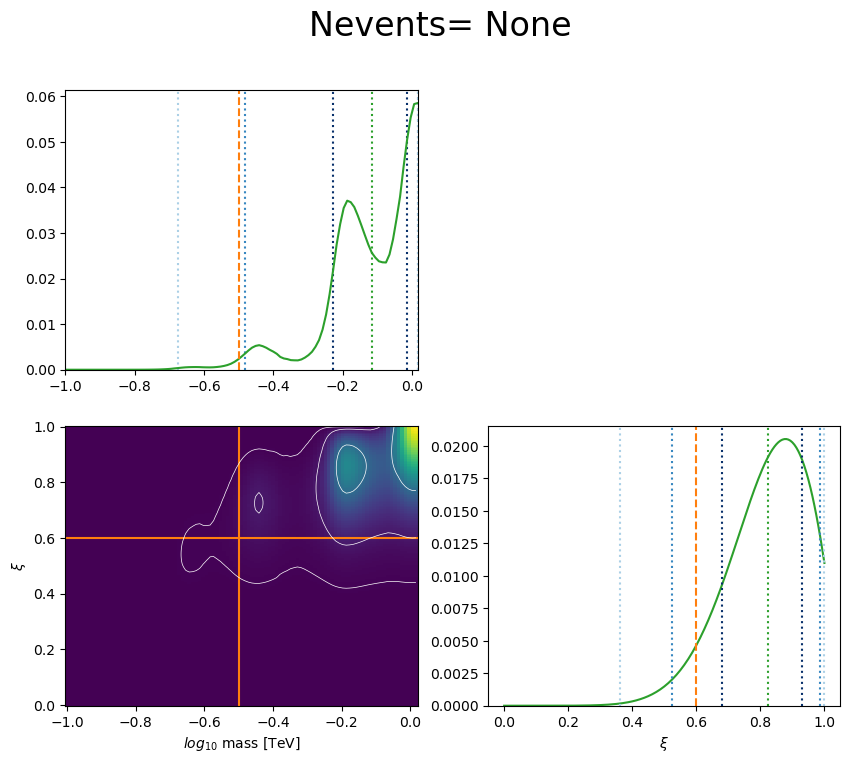

In [5]:
hyper_instance.plot_posterior(truevals=(0.6, -0.5), saveplot=False)

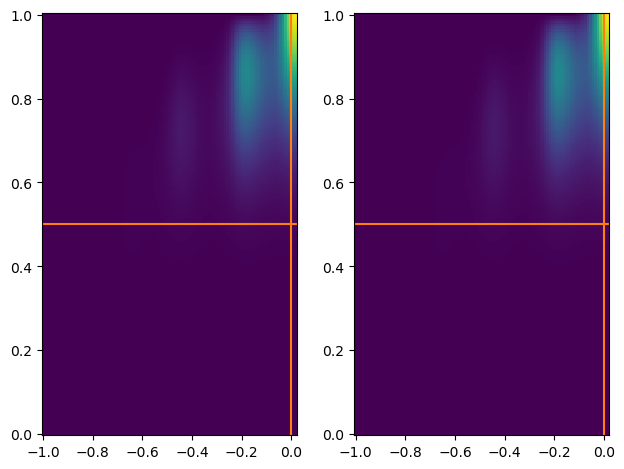

In [6]:
new_log_posterior = np.squeeze(hyper_instance.unnormed_log_posterior)
new_log_posterior = new_log_posterior-logsumexp(new_log_posterior)
plt.figure()
plt.subplot(121)
plt.pcolormesh(hyper_instance.hyperparameter_axes_tuple[0][0], hyper_instance.mixture_axes[0], np.exp(new_log_posterior))
plt.axvline(0.0, c='tab:orange')
plt.axhline(0.5, c='tab:orange')

plt.subplot(122)
plt.pcolormesh(logmassrange, xi_range, np.exp(log_posterior-logsumexp(log_posterior)))
plt.axvline(0.0, c='tab:orange')
plt.axhline(0.5, c='tab:orange')
plt.tight_layout()
plt.show()

In [7]:
np.squeeze(hyper_instance.unnormed_log_posterior)-log_posterior

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_51854/564880454.py:1: RuntimeWarning: invalid value encountered in subtract
  np.squeeze(hyper_instance.unnormed_log_posterior)-log_posterior


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.]])